### 06-04 자동 미분과 선형 회귀 실습

### 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
# tape_gradeint()는 자동 미분 기능을 수행.
# 임의로 2w^2+5라는 식을 세워보고, w에 대해 미분해보자.

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y +5
    return z

with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 2. 자동 미분을 이용한 선형 회귀 구현
- 우선 가중치 변수 w와 b를 선언. 학습될 값이므로 임의의 값인 4와 1로 초기화

In [3]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [4]:
@tf.function
def hypothesis(x):
  return w*x + b

In [5]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [6]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [7]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [8]:
optimizer = tf.optimizers.SGD(0.01)

In [9]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [10]:
# w와 b 값이 계속 업데이트 됨에 따라 cost가 지속적으로 줄어드는 것을 확인.
# 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers


x=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation = 'linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용.
model.compile(optimizer = sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y 데이터에 대해서 오차를 최소화하는 작업을 300번 시도.
model.fit(x,y, epochs=300)

Epoch 1/300


c:\Users\user\Desktop\Basic_Study\.venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 147ms/step - loss: 4607.5742 - mse: 4607.5742
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 568.0640 - mse: 568.0640
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 71.0309 - mse: 71.0309
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 9.8730 - mse: 9.8730
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 2.3464 - mse: 2.3464
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4186 - mse: 1.4186
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3028 - mse: 1.3028
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2869 - mse: 1.2869
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2834 - mse: 1.2834
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2813 - mse: 1.2813
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 1.279

1/1 [==============================] - 0s 42ms/step


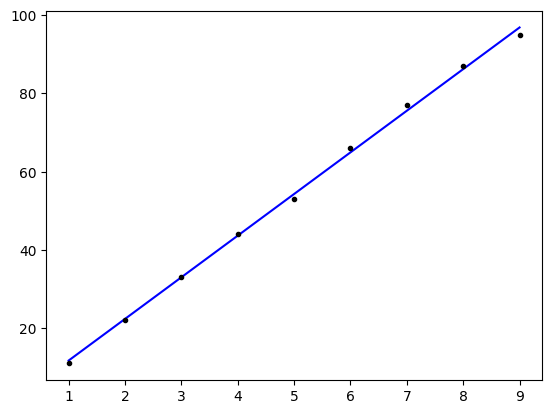

In [17]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [18]:
# 4) 3차원 텐서(다차원 배열)
# 3차원 이상의 텐서부터 본격적으로 텐서라고 부른다.
'''
자연어 처리에서 특히 자주 보게 되는 것이 3D 텐서.
3D 텐서는 시퀀스 데이터를 표현할때 자주 사용되기 때문.
시퀀스 데이터는 주로 단어의 시퀀스를 의미, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있다.

'''

d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)
